![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(os.getcwd() + '/kaggle/input'):
    
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\study\skillFactory\module_3\sample/kaggle/input\kaggle_task.csv
C:\study\skillFactory\module_3\sample/kaggle/input\main_task.csv
C:\study\skillFactory\module_3\sample/kaggle/input\sample_submission.csv


In [52]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [53]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [54]:
# TODO - delete
DATA_DIR = os.getcwd() + '/kaggle/input'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [56]:
df_train.nunique(dropna=False)

Restaurant_id        11909
City                    31
Cuisine Style         9008
Ranking              11936
Rating                   9
Price Range              4
Number of Reviews     1460
Reviews              33516
URL_TA               39980
ID_TA                39980
dtype: int64

In [57]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [58]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [59]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [60]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [62]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
6276,id_6276,Lyon,NaN,1178.0,NaN,10.0,"[[], []]",/Restaurant_Review-g187265-d8084167-Reviews-As...,d8084167,0,0.0
16342,id_9743,Paris,"['French', 'European']",9745.0,$$ - $$$,103.0,"[['typical french attitude', ""Look we're cool....",/Restaurant_Review-g187147-d1990809-Reviews-Me...,d1990809,1,3.5
7440,id_7440,Paris,['Vegetarian Friendly'],6707.0,$$ - $$$,33.0,"[['great brunch spot', 'For the Passy Madames ...",/Restaurant_Review-g187147-d5895172-Reviews-Th...,d5895172,0,0.0
28287,id_801,Amsterdam,['Bar'],803.0,$$ - $$$,74.0,"[['Incredible food! Nice chilled out bar', 'Ni...",/Restaurant_Review-g188590-d7239926-Reviews-MO...,d7239926,1,4.5
17464,id_2213,Stockholm,['Grill'],2216.0,NaN,4.0,"[['Hamburgare', 'Food good and service great']...",/Restaurant_Review-g189852-d1413424-Reviews-Du...,d1413424,1,3.5


# Cleaning and Prepping Data


## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [63]:
#  столбец Number of Reviews равен 0 - по логике так и выходит (нет просмотров - нет и количества)
data['Number of Reviews'].fillna(0, inplace=True)

<AxesSubplot:>

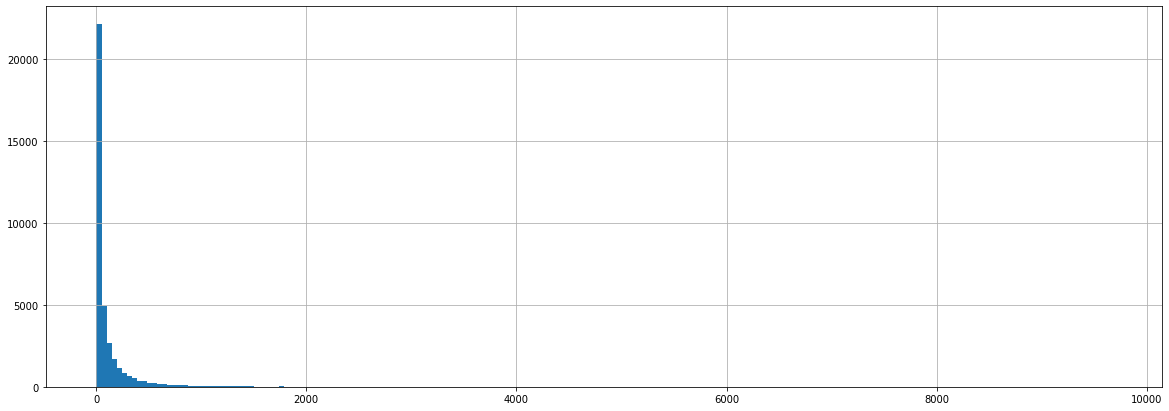

In [64]:
plt.rcParams['figure.figsize'] = (20,7)
df_train['Number of Reviews'].hist(bins=200)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [65]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              4
Number of Reviews     1574
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [66]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=['City',], dummy_na=True)

In [67]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [68]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по

In [69]:
PriceRange = {
                      '$$$$': 3,
                      '$$ - $$$': 2,
                      '$': 1 
        }
data['Price Range'] = data['Price Range'].map(PriceRange).fillna(0)

> Ведем новый признак - "цены неизвестны"

In [70]:
data['Price Range'].value_counts()

2.0    23041
0.0    17361
1.0     7816
3.0     1782
Name: Price Range, dtype: int64

# EDA 
Анализ данных


### Посмотрим распределение признака

<AxesSubplot:>

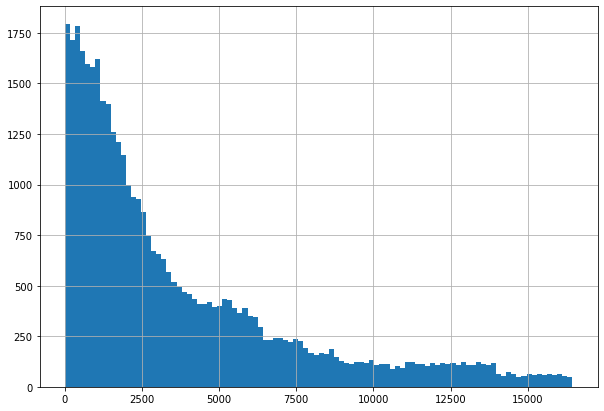

In [71]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

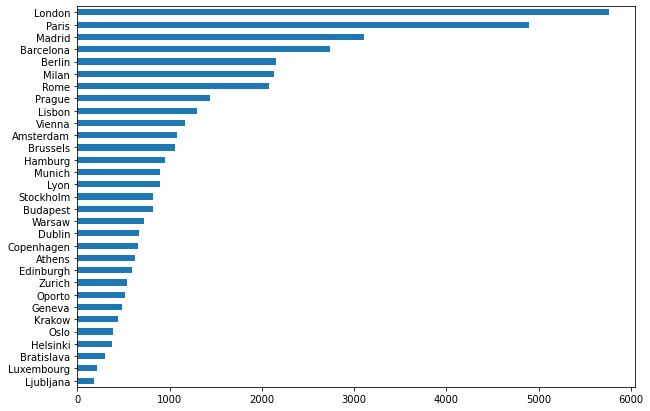

In [72]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

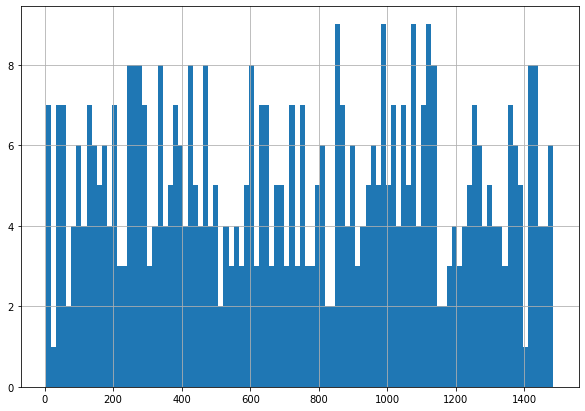

In [73]:
df_train['Ranking'][df_train['City'] =='Oporto'].hist(bins=100)

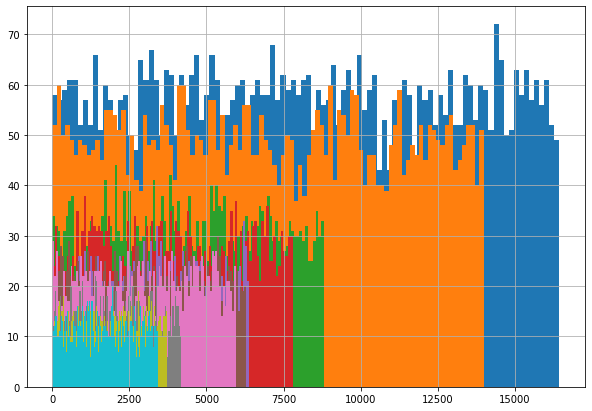

In [74]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.
Усредним параметр Ranking для всех городов, для того чтобы избежать усреднить остальные города!  


In [75]:
for x in (df_train['City'].value_counts()).index:
    temp = df_train['Ranking'][df_train['City'] == x].copy()
    min =temp.min()
    max =temp.max()
    df_train.loc[df_train['City'] == x, 'Ranking'] = (df_train['Ranking']- min) / (max - min)

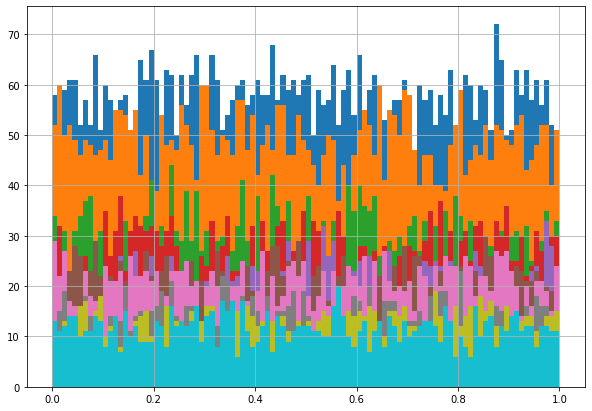

In [76]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

<AxesSubplot:>

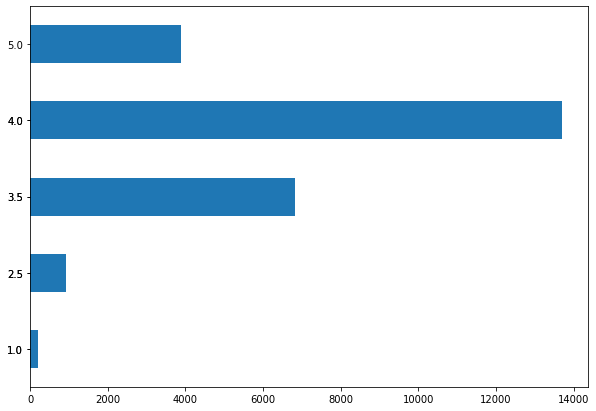

In [77]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

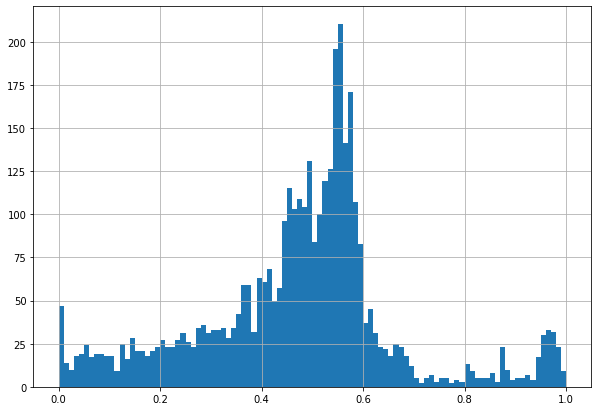

In [78]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

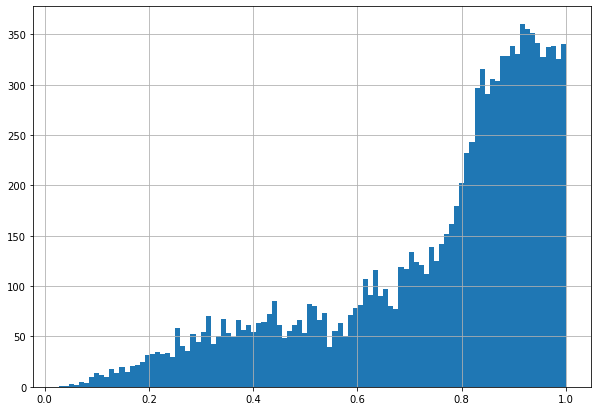

In [79]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

## Вывод: Получается Ranking при значениях от 0,4 до 0,6 принимает больше раз значений Rating равно 5

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

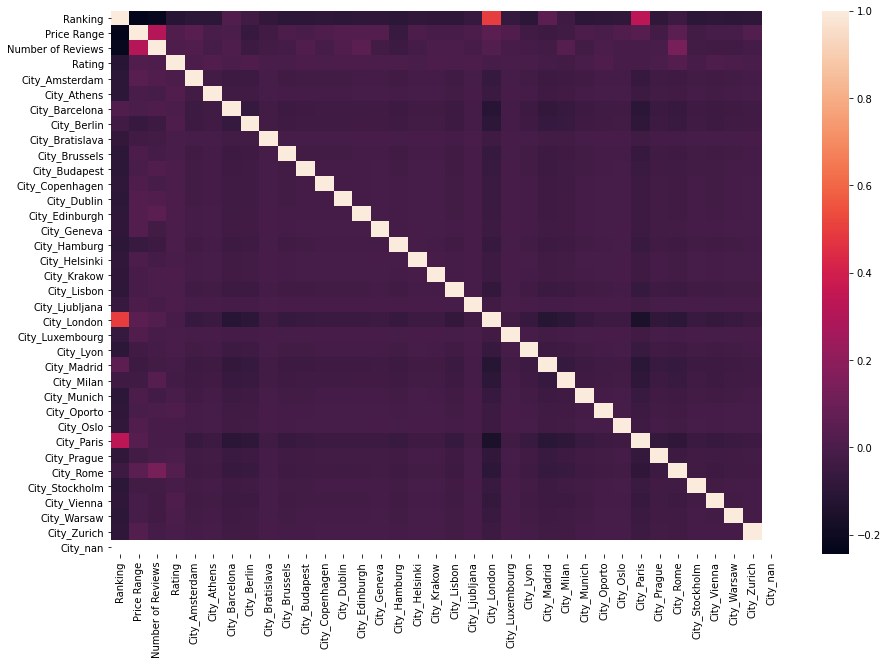

In [80]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

## Вывод: признаки мало коллерированны

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [81]:
# на всякий случай, заново подгружаем данные
DATA_DIR = os.getcwd() + '/kaggle/input'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [82]:
class PrepareDate():
    # в констуркоре определим методы обработки данных
    def __init__(self, df_output):
        self.df_output = df_output

    def processData(self):
        df_output = self.df_output.copy()

        df_output.drop(['ID_TA', ], axis=1, inplace=True)
        # признак сети - одинаковые Restaurant_id для ресторанов
        # УБИРАЕМ - так как новый признак никак не повлиял на результаьт в результате опыта
        # df_output = self.netRestaurant(df_output)

        # Далее заполняем пропуски
        df_output['Number of Reviews'].fillna(0, inplace=True)

        # нормировка значения Ranking
        df_output = self.normilizeRanking(df_output)

        # обработка цен - заполяняем цены согласно словарю
        df_output = self.ProcessPrice(df_output)
        #  обрботка  кухни - вводим новый признак (количество кухонь) + распарсиваем строку кухонь
        df_output = self.ProcessCuisine(df_output)

        # url - обработка url - извлекаем параметр
        df_output = self.ProcessURL(df_output)

        #  обрботка отзывов - вводим новые признаки:
        #  - средняя длина отзыва
        #  - количество слов (превосходные отзывы - поиск по словам)
        #  - взлечени дат - вычисдение разницы между датами отыва
        # Убираем эти параметры - большое время обработки и малый вклад в точность прогнозирования (по результатам опыта)
        # df_output = self.ProcessReviews(df_output)

        # вводим переменные dummi как города так и стили кухонь - такое действие позволяет не выводить новые признаки в
        # каких городах пицерии/бары/кафетерии и т.п. !!!
        df_output = pd.get_dummies(df_output, columns=['City', 'Cuisine Style', 'URL_TA'], dummy_na=True)

        # убираем не нужные для модели признаки
        object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object' and  s !='Restaurant_id' ]
        df_output.drop(object_columns, axis=1, inplace=True)

        return df_output

    def netRestaurant(self, data):
        list_net = (data['Restaurant_id'].value_counts()[data['Restaurant_id'].value_counts() > 1].index)
        data['net'] = data.apply(lambda row: 1 if row['Restaurant_id'] in list_net else 0, axis=1)
        return data


    def ProcessURL(self, data):
        data['URL_TA'] = data.apply(lambda row: str(row['URL_TA']).split('-')[1], axis=1)
        return data

    def ProcessPrice(self, data):
        PriceRange = {
            '$$$$': 3,
            '$$ - $$$': 2,
            '$': 1
        }
        data['Price Range'] = data['Price Range'].map(PriceRange).fillna(0)
        return data

    def ProcessReviews(self, data):
        data['Reviews'] = data['Reviews'].str.replace('[[', '', regex=False).str.replace(']]', '', regex=False) \
            .str.replace('[', '', regex=False).str.replace("'", '', regex=False).str.strip()
        data['Reviews'] = data['Reviews'].str.split('],')

        def correctDate(row):
            default = '01/01/2000'

            if isinstance(row['Reviews'], list):
                if len(row['Reviews']) == 2:
                    dates = str(row['Reviews'][1]).replace(' ', '')
                    Reviews_arr = dates.split(',')
                    if len(Reviews_arr) == 2:
                        row['ReviewDate1'] = Reviews_arr[0]
                        row['ReviewDate2'] = Reviews_arr[1]
                    elif len(Reviews_arr) == 1 and Reviews_arr[0] != '':
                        row['ReviewDate1'] = Reviews_arr[0]
                        row['ReviewDate2'] = Reviews_arr[0]
                    else:
                        row['ReviewDate1'] = default
                        row['ReviewDate2'] = default

                    # среднее количество слов
                    Reviews_str = str(row['Reviews'][0])
                    Reviews_str_arr = Reviews_str.split(',')
                    if len(Reviews_str_arr) == 2:
                        l = [len(Reviews_str_arr[0]), len(Reviews_str_arr[1])]
                        row['ReviewLen'] = statistics.mean(l)
                    elif len(Reviews_str_arr) == 1 and Reviews_str_arr[0] != '':
                        l = [len(Reviews_str_arr[0])]
                        row['ReviewLen'] = statistics.mean(l)
                    else:
                        row['ReviewLen'] = 0

                    #  по словам
                    good_words = ['good', 'yummy', 'fine', 'great', 'tasty',
                                  'satisfaction', 'amazing', 'nice', 'best',
                                  'friendly', 'pleasant', 'exellent', 'loved',
                                  'love', 'lovely', 'welcoming', 'wonderful',
                                  'perfect', 'delicious', 'favourite', 'sweet',
                                  'yum', 'adequate', 'happy', 'beautiful', 'liked', 'like']

                    str_reviews = str(row['Reviews'][0]).lower()
                    count = 0
                    for word in good_words:
                        if word in str_reviews:
                            count += 1
                    row['Reviews_count'] = count
            else:
                row['ReviewDate1'] = default
                row['ReviewDate2'] = default
                row['ReviewLen'] = 0
                row['Reviews_count'] = 0
            return row

        data = data.apply(lambda row: correctDate(row), axis=1)
        data['ReviewDate1'] = pd.to_datetime(data['ReviewDate1'], format='%m/%d/%Y')
        data['ReviewDate2'] = pd.to_datetime(data['ReviewDate2'], format='%m/%d/%Y')
        data['ReviewDiffDate'] = ((data['ReviewDate2'] - data['ReviewDate1']).dt.days).abs()
        data['ReviewDiffDate'].fillna(0, inplace=True)
        data['ReviewLen'].fillna(0, inplace=True)
        data['Reviews_count'].fillna(0, inplace=True)
        data = data.drop(['ReviewDate1', 'ReviewDate2'], axis=1)

        return data

    def ProcessCuisine(self, data):
        # TODO обработка кухни
        data['Cuisine Style'] = data['Cuisine Style'].str.replace('[', '', regex=False).str.replace(']', '',
                                                                                                    regex=False) \
            .str.replace("'", '', regex=False).str.strip()
        data['Cuisine Style'] = data['Cuisine Style'].str.split(', ')

        data['Cuisine_count'] = data['Cuisine Style'].apply(lambda X: len(X) if isinstance(X, list) else 1)

        data = data.explode('Cuisine Style')
        return data

    def normilizeRanking(self, data):
        for x in (data['City'].value_counts()).index:
            temp = data['Ranking'][data['City'] == x].copy()
            min = temp.min()
            max = temp.max()
            data.loc[data['City'] == x, 'Ranking'] = (data['Ranking'] - min) / (max - min)
        return data

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [83]:
df_object = PrepareDate(data)
df_preproc = df_object.processData()
df_preproc.sample(10)

,Restaurant_id,Ranking,Price Range,Number of Reviews,sample,Rating,Cuisine_count,City_Amsterdam,City_Athens,City_Barcelona,...,URL_TA_g950777,URL_TA_g950779,URL_TA_g950780,URL_TA_g950781,URL_TA_g950782,URL_TA_g950783,URL_TA_g950784,URL_TA_g950785,URL_TA_g950786,URL_TA_nan
36369,id_5321,0.604337,0.0,4.0,1,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33201,id_0,0.000000,3.0,241.0,1,5.0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13334,id_303,0.153374,2.0,230.0,1,4.0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36931,id_11046,0.672323,2.0,166.0,1,3.5,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36891,id_132,0.054121,2.0,545.0,1,4.5,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,id_4341,0.045916,1.0,154.0,0,0.0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17817,id_2195,0.133735,2.0,240.0,1,4.5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22995,id_599,0.304437,2.0,116.0,1,3.5,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46098,id_429,0.174178,2.0,132.0,1,4.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27839,id_85,0.068383,2.0,150.0,1,4.5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Пострим корреляцию между признаками

<AxesSubplot:>

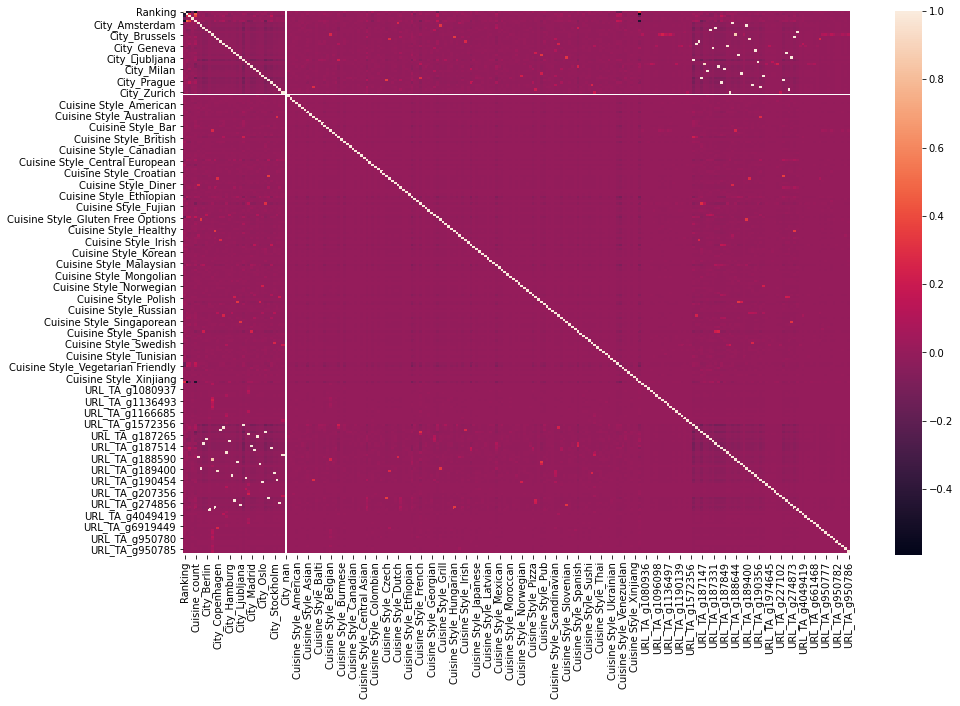

In [84]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df_preproc.drop(['sample'], axis=1).corr(),)

## Вывод: выявлена зависимость параметра в URL (пример g187147 в зависимости от города),  в принципе все параметры модели мало зависимы друг от друга! 

In [85]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample', 'Restaurant_id'], axis=1)

# подготовка тестируемых данных - мы расширили список по параметры стилей кухонь!!!
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)
test_data = test_data.drop_duplicates(subset=['Restaurant_id'], keep='first').drop(['Restaurant_id'], axis=1)


y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [86]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [87]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 238), (104896, 238), (104896, 237), (83916, 237), (20980, 237))

# Model 
Сам ML

In [88]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [89]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [90]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [ ]:
test_data.sample(10)

In [ ]:
test_data = test_data.drop(['Rating'], axis=1)

In [ ]:
sample_submission

In [ ]:
predict_submission = model.predict(test_data)

In [ ]:
predict_submission

In [ ]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

## Вывод по работе:
- была рссмотрена выборка, по ней сформировал новые признаки. Как показал результат поиск новых признаков, разбиение данных и 
представление данных в ином формате позволил существенно предсказывать рейтинги ресторанов! 
